In [1]:
from matplotlib import pyplot as plt
import numpy as np
from itertools import product
from urban_growth.simulator import *
% matplotlib inline

In [12]:
# Params

## Initial Configuration
L = 100
rho = .44
blur = 2

## Rural/Urban Size Threshold
T = 50

## Dynamical Parameters, not assuming that these are good ones. 

pars_1 = {'gamma_r' : 2.0,     # rural settlement more diffuse than urban
          'gamma_u' : 2.0,      
          'alpha_r' : .35,       
          'alpha_u' : .1,
          'beta_r'  : -10,      # low background rates
          'beta_u'  : -10}

pars_0 = {'gamma_r' : 3.0,     # rural settlement more diffuse than urban
          'gamma_u' : 4.0,      
          'C_r' : .25,       
          'C_u' : .3}

truncation = None

geo = np.ones((L, L))

for i in np.arange(0, L):
    geo[:,i] = 1.0*i / L 

In [13]:
m = simulator(geo = geo)
m.set_M0(L = L, density = rho, blur = blur)

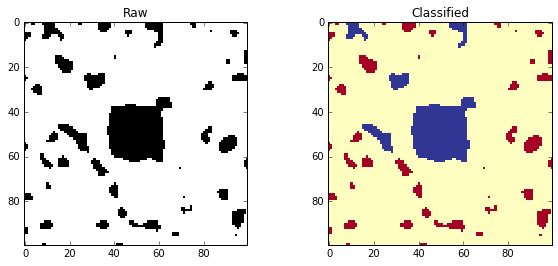

In [14]:
fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(121)
ax1.imshow(m.get_M0(), interpolation = 'nearest', cmap = 'Greys')
plt.title('Raw')

ax2 = fig.add_subplot(122)
ax2.imshow(m.settlement_type_matrix(T), interpolation = 'nearest', cmap = 'RdYlBu')
plt.title('Classified')

In [15]:
density_pars = {'thresh' : T,
                'pars'   : pars_0,
                'model'  : model_0,
                'use_geo' : True,
                'truncation' : truncation}

densities = m.density(**density_pars)

M = m.dynamics(n_iters = 10, **density_pars)

recalculating distances
recalculating distances
recalculating distances
recalculating distances
recalculating distances
recalculating distances
recalculating distances
recalculating distances
recalculating distances
recalculating distances
recalculating distances


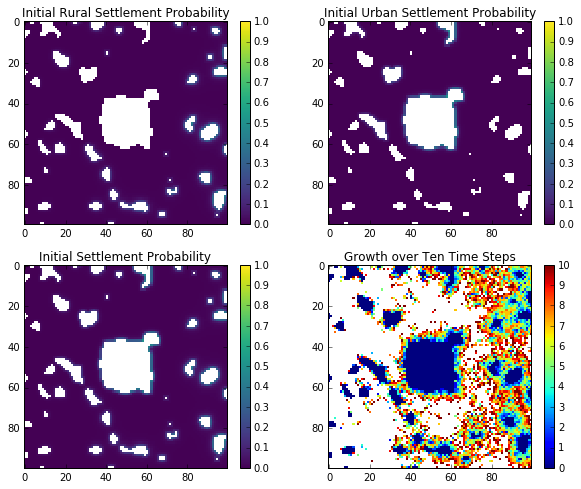

In [16]:
density_pars = {'vmin'         : 0,
                'vmax'         : 1,
               'interpolation' : 'nearest',
               'cmap'          : 'viridis'}

fig = plt.figure(figsize = (10, 8))
ax1 = fig.add_subplot(221)
im = ax1.imshow(densities[0], **density_pars)
plt.colorbar(im)
plt.title('Initial Rural Settlement Probability')

ax2 = fig.add_subplot(222)
im = ax2.imshow(densities[1],**density_pars)
plt.colorbar(im)
plt.title('Initial Urban Settlement Probability')


ax3 = fig.add_subplot(223)
im = ax3.imshow(densities[0] + densities[1], **density_pars)
plt.colorbar(im)
plt.title('Initial Settlement Probability')


ax4 = fig.add_subplot(224)
im = ax4.imshow(M, interpolation = 'nearest')
plt.colorbar(im)

plt.title('Growth over Ten Time Steps')